In [2]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# for lab2, prof wanted to test this
from sklearn.datasets import fetch_openml

X, y = fetch_openml(
    "mnist_784", version=1, return_X_y=True, as_frame=False, parser="pandas"
)

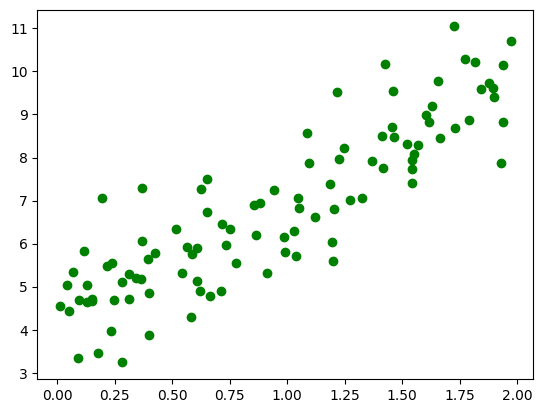

In [3]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) # column vector
y = 4 + 3 * X + np.random.randn(m, 1) # column vector
plt.scatter(X,y, color = 'g')

In [4]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X) # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [5]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new) # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

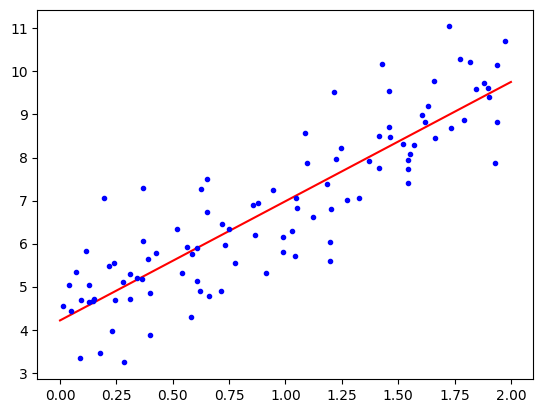

In [42]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_


(array([4.21509616]), array([[2.77011339]]))

In [9]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print(theta_best_svd)


[[4.21509616]
 [2.77011339]]


In [11]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

In [32]:
eta = 0.1 # learning rate
n_epochs = 100
m = len(X_b) # number of instances
thtarr = []
np.random.seed(42)
theta = np.random.randn(2, 1) # randomly initialized model parameters
for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients
    thtarr.append(theta)
print(theta)

[[4.19463891]
 [2.78817602]]


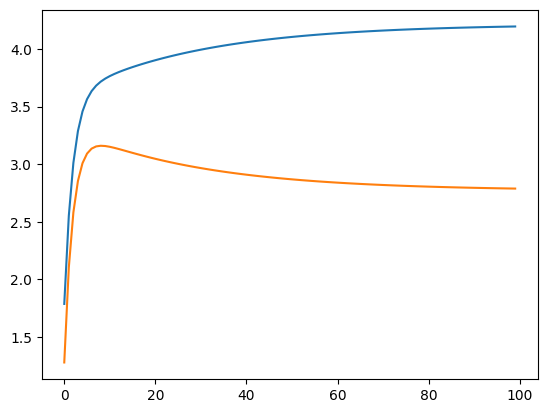

In [33]:
epochs = []
tht0 = []
tht1 = []
for epoch in range(n_epochs):
    epochs.append(epoch)
    tht0.append(thtarr[epoch][0])
    tht1.append(thtarr[epoch][1])
plt.plot(epochs, tht0)
plt.plot(epochs, tht1)

In [38]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)
np.random.seed(42)
theta = np.random.randn(2, 1) # random initialization
for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi) # for SGD, do not divide by m
        # note below
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

$$\frac{2}{m} X^{T} (X \theta - y)$$

$$2 \times x_{i}^{T} (x_{i} \theta - y_{i})$$
for Stochastic Gradient Descent, where we take random values (xi) from X_b

## Linear Regression

$$h(x) = \sum^{d}_{i=0} \theta_{i}x_{i} = \theta^{T}x$$

$$J(\theta) = \frac{1}{2} \sum^{n}_{i=1}(h_{\theta}(X^{(i)}) - y^{(i)})^{2}$$

$$\frac{\delta}{\delta \theta_{j}}J(\theta) = \frac{\delta}{\delta \theta_{j}}J(\theta) \frac{1}{2} (h_{\theta}(x) - y)^{2}$$

$$\theta_{j} := \theta_{j} + \alpha \sum^{n}_{i=1} (y^{(i)} - h_{\theta}(x^{(i)}))x_{j}^{(i)}\text{, for every }j$$

$$X^{T}X \theta - X^{T} y$$

$$\theta = (X^{T}X)^{-1} X^{T} y$$

$$y^{(i)} = \theta^{T} x^{(i)} + \epsilon^{(i)}$$

$$\sum_{i} (y^{(i)} - \theta^{T} x^{(i)})^{2}$$

## Logistic Regression

$$h_{\theta}(x) = g(\theta^{T}x) = \frac{1}{1 + e^{-\theta^{T}x}}$$